# 1. VAR Process

In the data `raotb16.csv` we have some macroeconomic data.

1. Test which series Granger cause each other.

2. Test which series are stationary

3. Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that need it.

4. Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. Plot the predictions against the data for each series.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.api import VAR

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/raotb16.csv',index_col='date',parse_dates=True)
df.index.freq = 'QS'

In [3]:
grangercausalitytests(df[['rgnp','ulc']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.3823  , p=0.5364  , df=1
likelihood ratio test: chi2=0.3817  , p=0.5367  , df=1
parameter F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=9.6386  , p=0.0081  , df=2
likelihood ratio test: chi2=9.2739  , p=0.0097  , df=2
parameter F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=13.0544 , p=0.0045  , df=3
likelihood ratio test: chi2=12.3920 , p=0.0062  , df=3
parameter F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4664  , p=0.0005  

In [4]:
grangercausalitytests(df[['gdfcf','gdfce']],maxlag=1);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.6205  , p=0.0040  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=8.8378  , p=0.0030  , df=1
likelihood ratio test: chi2=8.5324  , p=0.0035  , df=1
parameter F test:         F=8.6205  , p=0.0040  , df_denom=119, df_num=1


In [5]:
grangercausalitytests(df[['gdf','ulc']],maxlag=1);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=63.4905 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=65.0911 , p=0.0000  , df=1
likelihood ratio test: chi2=52.1641 , p=0.0000  , df=1
parameter F test:         F=63.4905 , p=0.0000  , df_denom=119, df_num=1


In [6]:
grangercausalitytests(df[['gdfco','gdfim']],maxlag=1);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=81.2517 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=83.3001 , p=0.0000  , df=1
likelihood ratio test: chi2=63.4951 , p=0.0000  , df=1
parameter F test:         F=81.2517 , p=0.0000  , df_denom=119, df_num=1


In [7]:
grangercausalitytests(df[['rgnp','gdfcf']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2517  , p=0.6168  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.2580  , p=0.6115  , df=1
likelihood ratio test: chi2=0.2578  , p=0.6117  , df=1
parameter F test:         F=0.2517  , p=0.6168  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4470  , p=0.6406  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=0.9325  , p=0.6273  , df=2
likelihood ratio test: chi2=0.9290  , p=0.6285  , df=2
parameter F test:         F=0.4470  , p=0.6406  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6113  , p=0.1907  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=5.1334  , p=0.1623  , df=3
likelihood ratio test: chi2=5.0267  , p=0.1699  , df=3
parameter F test:         F=1.6113  , p=0.1907  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1569  , p=0.0786  

In [8]:
grangercausalitytests(df[['rgnp','gdfce']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0809  , p=0.7766  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.0829  , p=0.7734  , df=1
likelihood ratio test: chi2=0.0829  , p=0.7735  , df=1
parameter F test:         F=0.0809  , p=0.7766  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4103  , p=0.2482  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=2.9421  , p=0.2297  , df=2
likelihood ratio test: chi2=2.9069  , p=0.2338  , df=2
parameter F test:         F=1.4103  , p=0.2482  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9068  , p=0.4402  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=2.8891  , p=0.4090  , df=3
likelihood ratio test: chi2=2.8548  , p=0.4146  , df=3
parameter F test:         F=0.9068  , p=0.4402  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5294  , p=0.1986  

In [9]:
def adf_test(series,title=''):
    print(f'ADF Test:{title}')
    result= adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','# lag used', '# observation']
    out = pd.Series(result[0:4],index = labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
lst = ['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']
for item in lst:
    adf_test(df[item])

ADF Test:
ADF test statistics       0.641882
p-value                   0.988604
# lag used                2.000000
# observation           120.000000
critical value (1%)      -3.486056
critical value (5%)      -2.885943
critical value (10%)     -2.579785
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF Test:
ADF test statistics       1.274320
p-value                   0.996461
# lag used                1.000000
# observation           121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF Test:
ADF test statistics       1.396716
p-value                   0.997099
# lag used                2.000000
# observation           120.000000
critical value (1%)      -3.486056
critical value (5%)      -2.885943
critical value (10%)     -2.57

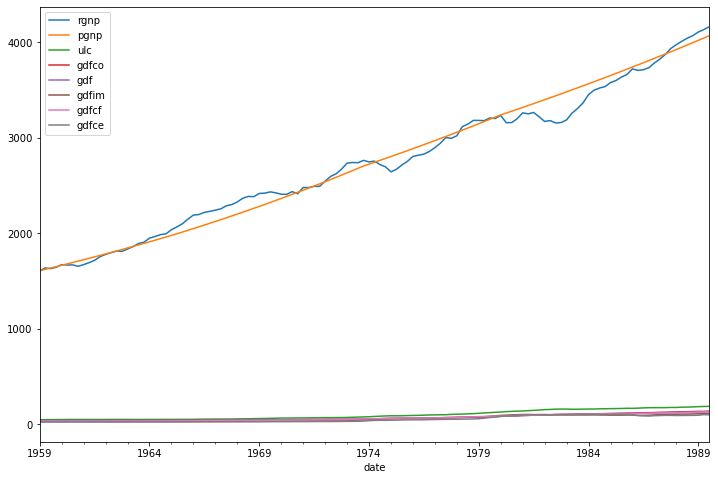

In [11]:
df.plot(figsize=(12,8))

In [12]:
df_transform = df.diff()

In [13]:
lst = ['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']

lst = ['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']
for item in lst:
    adf_test(df_transform[item])

ADF Test:
ADF test statistics      -5.427594
p-value                   0.000003
# lag used                1.000000
# observation           120.000000
critical value (1%)      -3.486056
critical value (5%)      -2.885943
critical value (10%)     -2.579785
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF Test:
ADF test statistics      -1.758967
p-value                   0.401015
# lag used                0.000000
# observation           121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF Test:
ADF test statistics      -3.576080
p-value                   0.006235
# lag used                1.000000
# observation           120.000000
critical value (1%)      -3.486056
critical value (5%)      -2.885943
critical value (10%)     -2.579785
Stro

In [15]:
df_transform = df_transform.diff().dropna()

lst = ['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']
for item in lst:
    adf_test(df_transform[item])

ADF Test:
ADF test statistics    -7.231143e+00
p-value                 1.993203e-10
# lag used              9.000000e+00
# observation           1.100000e+02
critical value (1%)    -3.491245e+00
critical value (5%)    -2.888195e+00
critical value (10%)   -2.580988e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF Test:
ADF test statistics    -6.830641e+00
p-value                 1.897629e-09
# lag used              6.000000e+00
# observation           1.130000e+02
critical value (1%)    -3.489590e+00
critical value (5%)    -2.887477e+00
critical value (10%)   -2.580604e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF Test:
ADF test statistics    -7.846173e+00
p-value                 5.761404e-12
# lag used              9.000000e+00
# observation           1.100000e+02
critical value (1%)    -3.491245e+00
critical value (5%)    -2.888195e+00
critical

In [16]:
num_observation = 4

In [17]:
train = df_transform[:-num_observation]
test = df_transform[-num_observation:]

In [18]:
model = VAR(train)

for p in [1,2,3,4, 5]:
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 3.7008979597918072


ORDER 2
AIC: 2.037744388074595


ORDER 3
AIC: 1.2710988906021248


ORDER 4
AIC: 0.9751521339276019


ORDER 5
AIC: 0.3843414303066286




In [19]:
results=model.fit(4)#.summary()

In [21]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Apr, 2021
Time:                     18:21:09
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    7.38304
Nobs:                     112.000    HQIC:                   3.57504
Log likelihood:          -1061.98    FPE:                    3.06226
AIC:                     0.975152    Det(Omega_mle):        0.388010
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.355274         2.889014            0.123           0.902
L1.rgnp         -1.221048         0.154867           -7.884           0.000
L1.pgnp         -1.923334         5.310903           -0.362           0.717
L1.ul

In [22]:
lagged_values = train.values[-4:]
lagged_values.shape

(4, 8)

In [23]:
z = results.forecast(y=lagged_values,steps = 4)

In [24]:
idx = pd.date_range('1988-10-01', periods = 4, freq='QS')

In [25]:
df_forecast = pd.DataFrame(data=z, index = idx,columns=['rgnp_2d', 'pgnp_2d', 'ulc_2d', 'gdfco_2d', 'gdf_2d', 'gdfim_2d', 'gdfcf_2d', 'gdfce_2d'])
df_forecast.head()

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
1988-10-01,77.323563,1.187070,2.197731,0.322505,-0.138243,0.461476,-1.222993,-0.518000
1989-01-01,-113.829384,-1.392659,0.067571,0.194670,0.235885,1.749823,1.355361,3.250555
1989-04-01,88.263588,0.793861,-0.645518,-0.477877,-0.669559,-1.357577,-1.680534,-4.055064
1989-07-01,-80.604737,-0.664989,1.538558,0.461553,0.846828,-0.733847,1.531338,1.894013


In [26]:
df_forecast['rgnp1d'] = (df['rgnp'].iloc[-num_observation-1]-df['rgnp'].iloc[-num_observation-2]) + df_forecast['rgnp_2d'].cumsum()
df_forecast['rgnpForecast'] = df['rgnp'].iloc[-num_observation-1] + df_forecast['rgnp1d'].cumsum()

In [27]:
df_forecast['pgnp1d'] = (df['pgnp'].iloc[-num_observation-1]-df['pgnp'].iloc[-num_observation-2]) + df_forecast['pgnp_2d'].cumsum()
df_forecast['pgnpForecast'] = df['pgnp'].iloc[-num_observation-1] + df_forecast['pgnp1d'].cumsum()

In [28]:
df_forecast['ulc1d'] = (df['ulc'].iloc[-num_observation-1]-df['ulc'].iloc[-num_observation-2]) + df_forecast['ulc_2d'].cumsum()
df_forecast['ulcForecast'] = df['ulc'].iloc[-num_observation-1] + df_forecast['ulc1d'].cumsum()

In [29]:
df_forecast['gdfco1d'] = (df['gdfco'].iloc[-num_observation-1]-df['gdfco'].iloc[-num_observation-2]) + df_forecast['gdfco_2d'].cumsum()
df_forecast['gdfcoForecast'] = df['gdfco'].iloc[-num_observation-1] + df_forecast['gdfco1d'].cumsum()

In [30]:
df_forecast['gdf1d'] = (df['gdf'].iloc[-num_observation-1]-df['gdf'].iloc[-num_observation-2]) + df_forecast['gdf_2d'].cumsum()
df_forecast['gdfForecast'] = df['gdf'].iloc[-num_observation-1] + df_forecast['gdf1d'].cumsum()

In [31]:
df_forecast['gdfim1d'] = (df['gdfim'].iloc[-num_observation-1]-df['gdfim'].iloc[-num_observation-2]) + df_forecast['gdfim_2d'].cumsum()
df_forecast['gdfimForecast'] = df['gdfim'].iloc[-num_observation-1] + df_forecast['gdfim1d'].cumsum()

In [32]:
df_forecast['gdfcf1d'] = (df['gdfcf'].iloc[-num_observation-1]-df['gdfcf'].iloc[-num_observation-2]) + df_forecast['gdfcf_2d'].cumsum()
df_forecast['gdfcfForecast'] = df['gdfcf'].iloc[-num_observation-1] + df_forecast['gdfcf1d'].cumsum()

In [33]:
df_forecast['gdfce1d'] = (df['gdfce'].iloc[-num_observation-1]-df['gdfce'].iloc[-num_observation-2]) + df_forecast['gdfce_2d'].cumsum()
df_forecast['gdfceForecast'] = df['gdfce'].iloc[-num_observation-1] + df_forecast['gdfce1d'].cumsum()

In [34]:
df_forecast.head()

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d,rgnp1d,rgnpForecast,...,gdfco1d,gdfcoForecast,gdf1d,gdfForecast,gdfim1d,gdfimForecast,gdfcf1d,gdfcfForecast,gdfce1d,gdfceForecast
1988-10-01,77.323563,1.187070,2.197731,0.322505,-0.138243,0.461476,-1.222993,-0.518000,109.323563,4152.023563,...,1.522505,133.022505,1.461757,126.361757,0.561476,106.761476,1.277007,124.777007,-0.018000,92.782000
1989-01-01,-113.829384,-1.392659,0.067571,0.194670,0.235885,1.749823,1.355361,3.250555,-4.505821,4147.517743,...,1.717175,134.739680,1.697642,128.059399,2.311299,109.072775,2.632367,127.409374,3.232555,96.014555
1989-04-01,88.263588,0.793861,-0.645518,-0.477877,-0.669559,-1.357577,-1.680534,-4.055064,83.757768,4231.275510,...,1.239298,135.978978,1.028083,129.087482,0.953722,110.026497,0.951834,128.361208,-0.822509,95.192046
1989-07-01,-80.604737,-0.664989,1.538558,0.461553,0.846828,-0.733847,1.531338,1.894013,3.153030,4234.428541,...,1.700851,137.679829,1.874912,130.962394,0.219875,110.246372,2.483172,130.844380,1.071503,96.263549


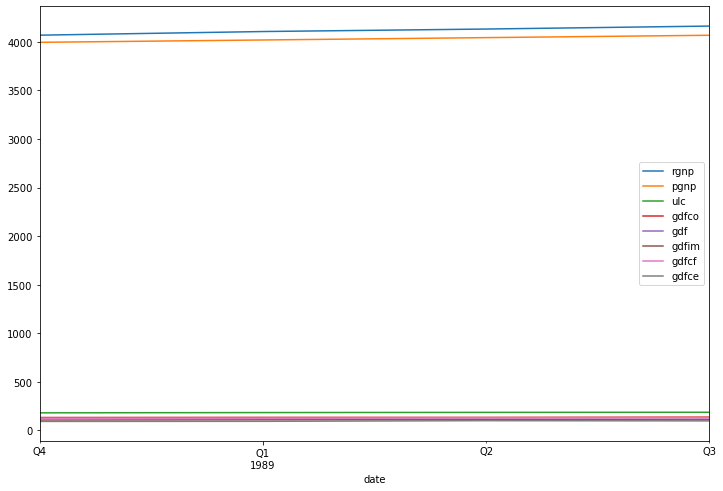

In [35]:
test_range = df[-num_observation:]
test_range.plot(figsize=(12,8))

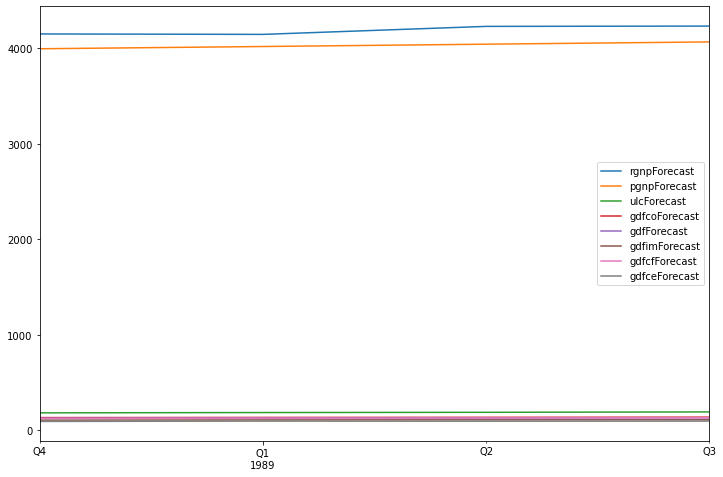

In [39]:
df_forecast[['rgnpForecast','pgnpForecast','ulcForecast','gdfcoForecast','gdfForecast','gdfimForecast','gdfcfForecast','gdfceForecast']].plot(figsize=(12,8))

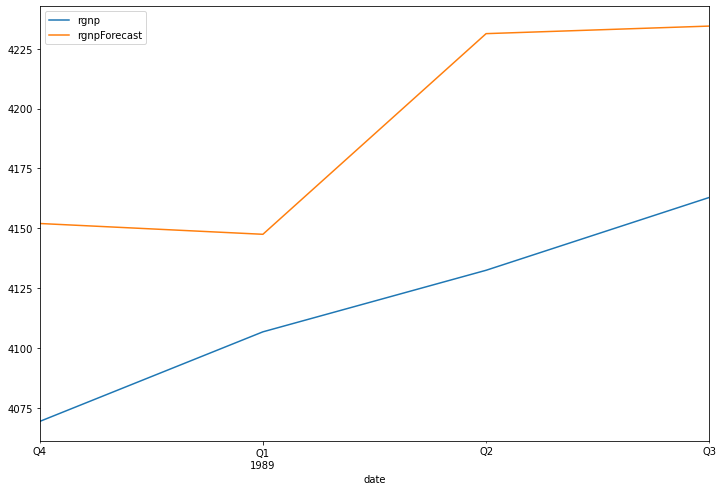

In [40]:
test_range['rgnp'].plot(legend=True,figsize=(12,8))
df_forecast['rgnpForecast'].plot(legend=True)

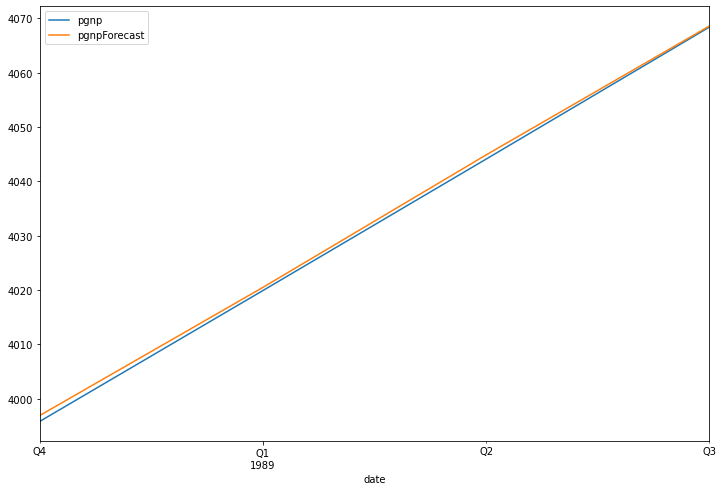

In [41]:
test_range['pgnp'].plot(legend=True,figsize=(12,8))
df_forecast['pgnpForecast'].plot(legend=True)

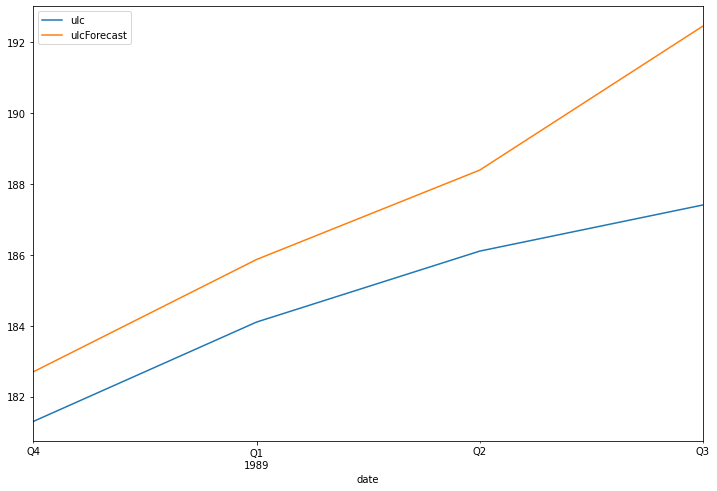

In [42]:
test_range['ulc'].plot(legend=True,figsize=(12,8))
df_forecast['ulcForecast'].plot(legend=True)

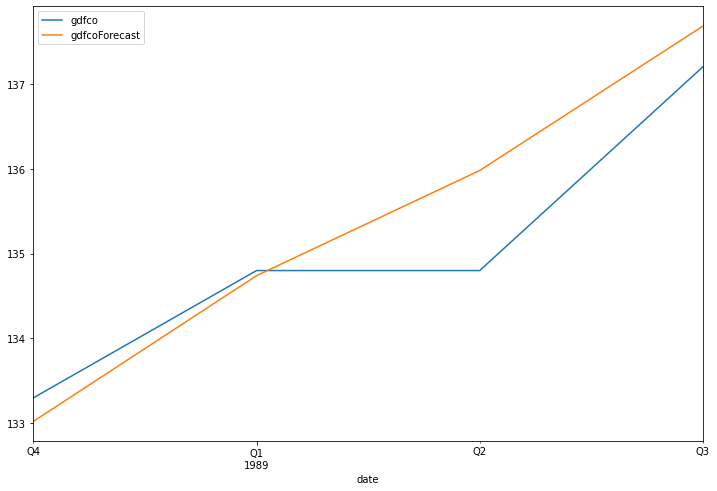

In [43]:
test_range['gdfco'].plot(legend=True,figsize=(12,8))
df_forecast['gdfcoForecast'].plot(legend=True)

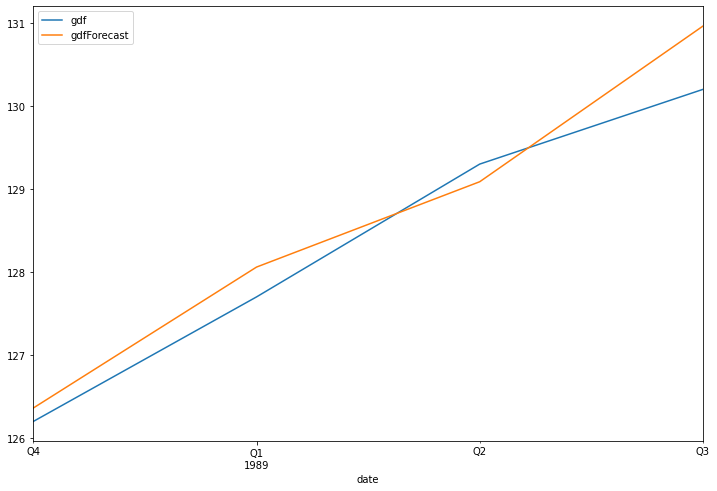

In [44]:
test_range['gdf'].plot(legend=True,figsize=(12,8))
df_forecast['gdfForecast'].plot(legend=True)

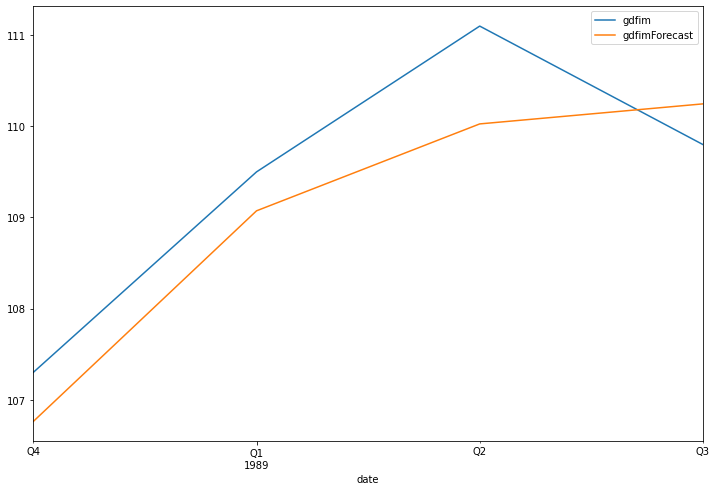

In [45]:
test_range['gdfim'].plot(legend=True,figsize=(12,8))
df_forecast['gdfimForecast'].plot(legend=True)

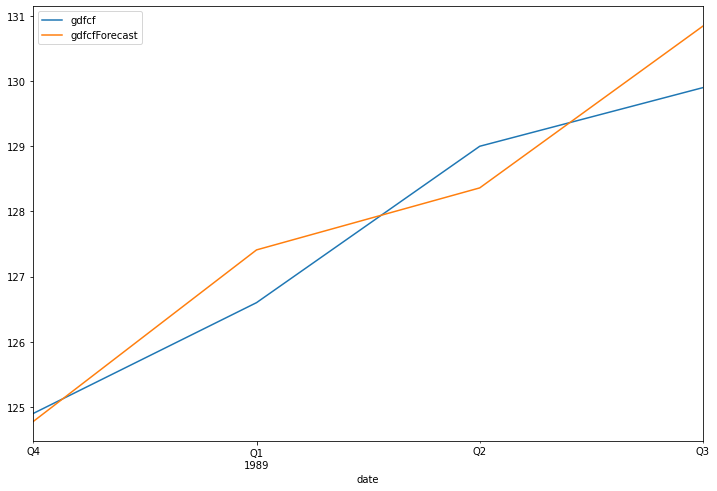

In [46]:
test_range['gdfcf'].plot(legend=True,figsize=(12,8))
df_forecast['gdfcfForecast'].plot(legend=True)

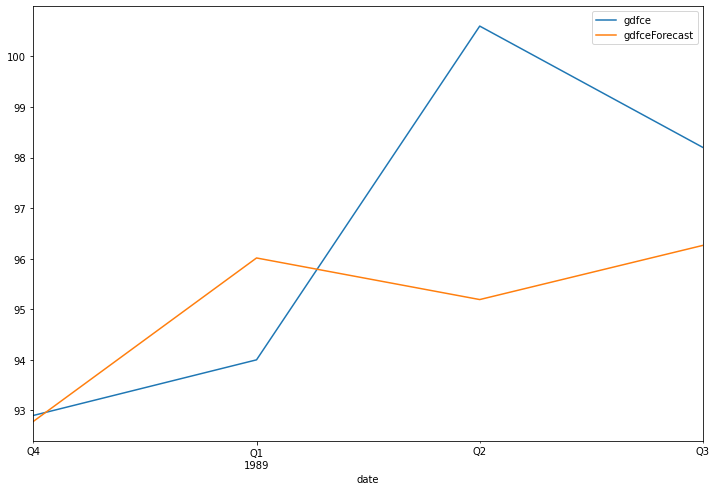

In [47]:
test_range['gdfce'].plot(legend=True,figsize=(12,8))
df_forecast['gdfceForecast'].plot(legend=True)

# 2. Gun Violence Panel

The [Gun Violence](https://www.kaggle.com/jameslko/gun-violence-data) dataset

1. Transform it into an amenable panel (or structure of multiple time series) to analyze and create a forecast for the next year outside the sample in **Chicago**, **Washington** and **New Orleans**, and the US as a whole.

2. Are there other (non time series) predictors which could be used in this dataset to help predict severity or number of shootings in the future? Analyze the data for feature importance and explain your findings.

In [48]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA

In [49]:
df1 = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')
df2 = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv',index_col='date',parse_dates=True)

df2 = df2[['city_or_county','n_killed']]
df2.index = pd.to_datetime(df1.date).dt.to_period('M').dt.to_timestamp()
df2.head()

,city_or_county,n_killed
date,,
2013-01-01,Mckeesport,0
2013-01-01,Hawthorne,1
2013-01-01,Lorain,1
2013-01-01,Aurora,4
2013-01-01,Greensboro,2


In [50]:
df1['Month-Yr'] = pd.to_datetime(df1.date).dt.to_period('M').dt.to_timestamp()
df1['year'] = pd.to_datetime(df1.date).dt.year
year = pd.Categorical(df1['year'])
df1['year1'] = year

In [51]:
chicago = df1[df1['city_or_county'] == 'Chicago']
washington = df1[df1['city_or_county'] == 'Washington']
newOrleans = df1[df1['city_or_county'] == 'New Orleans']

In [52]:
chicago2 = df2[df2['city_or_county'] == 'Chicago']
washington2 = df2[df2['city_or_county'] == 'Washington']
newOrleans2 = df2[df2['city_or_county'] == 'New Orleans']
usa2 = df2

# Chicago

In [53]:
chicago['n_guns_involved_T_F'] = chicago['n_guns_involved'].notna()
chicago1 = pd.get_dummies(chicago['n_guns_involved_T_F'], drop_first=True)
chicago1 = chicago1.join(chicago[['Month-Yr','congressional_district', 'state_senate_district','state_house_district','n_killed','n_injured','year1']])
chicago1.dropna(subset=['congressional_district', 'state_senate_district','state_house_district'],inplace=True)
chicago1 = chicago1.set_index(["state_house_district", "Month-Yr"])
chicago1.head()

,,True,congressional_district,state_senate_district,n_killed,n_injured,year1
state_house_district,Month-Yr,,,,,,
25.0,2013-02-01,0,2.0,13.0,0,4,2013
35.0,2013-03-01,0,1.0,18.0,0,7,2013
8.0,2013-05-01,0,7.0,4.0,0,4,2013
5.0,2013-05-01,0,7.0,3.0,0,4,2013
6.0,2013-06-01,1,7.0,3.0,1,4,2013


In [54]:
y_chicago = chicago1['n_killed']
X_chicago = chicago1.drop(['n_killed','n_injured'],axis=1)

chicago_exog = sm.add_constant(X_chicago)
chicago_mod = PooledOLS(y_chicago, chicago_exog)
chicago_pooled_res = chicago_mod.fit(cov_type='clustered', cluster_entity=True)
chicago_pooled_res

Dep. Variable:,n_killed,R-squared:,0.0048
Estimator:,PooledOLS,R-squared (Between):,-0.0334
No. Observations:,10293,R-squared (Within):,0.0049
Date:,"Wed, Apr 28 2021",R-squared (Overall):,0.0048
Time:,18:31:39,Log-likelihood,-5553.2
Cov. Estimator:,Clustered,,
,,F-statistic:,6.1572
Entities:,46,P-value,0.0000
Avg Obs:,223.76,Distribution:,"F(8,10284)"
Min Obs:,1.0000,,
Max Obs:,1272.0,F-statistic (robust):,15.669


In [55]:
adf_test(chicago2['n_killed'])

ADF Test:
ADF test statistics       -97.096004
p-value                     0.000000
# lag used                  0.000000
# observation           10813.000000
critical value (1%)        -3.430955
critical value (5%)        -2.861807
critical value (10%)       -2.566912
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [56]:
chicago2 = chicago2.groupby([chicago2.index])[['n_killed']].agg(np.sum)

58

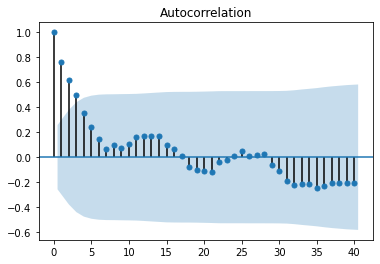

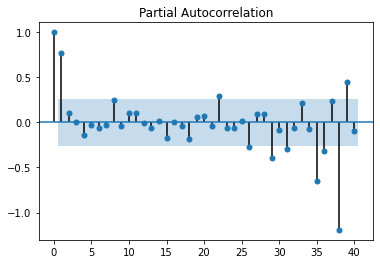

In [57]:
plot_acf(chicago2,lags = 40);
plot_pacf(chicago2,lags = 40);
len(chicago2)

In [58]:
chicago2_train = chicago2.iloc[:46]
chicago2_test = chicago2.iloc[46:]

In [59]:
chicago2_model = ARIMA(chicago2['n_killed'],order=(0,0,1))
chicago2_result = chicago2_model.fit(disp=-1)
chicago2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               n_killed   No. Observations:                   58
Model:                     ARMA(0, 1)   Log Likelihood                -235.441
Method:                       css-mle   S.D. of innovations             13.961
Date:                Wed, 28 Apr 2021   AIC                            476.882
Time:                        18:32:26   BIC                            483.063
Sample:                             0   HQIC                           479.290
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             35.9177      2.946     12.193      0.000      30.144      41.691
ma.L1.n_killed     0.6173      0.081      7.657      0.000       0.459       0.775
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6200           +0.0000j            1.6200            0.5000
-----------------------------------------------------------------------------
"""

In [96]:
chicago2_start = len(chicago2_train)
chicago2_end = len(chicago2_train)+len(chicago2_test)-1
chicago2_prediction = chicago2_result.predict(start=chicago2_start,end=chicago2_end,typ='levels')
chicago2_prediction

date
2017-04-01    33.424072
2017-05-01    38.742312
2017-06-01    42.249581
2017-07-01    53.047592
2017-08-01    44.530278
2017-09-01    38.676752
2017-10-01    45.376478
2017-11-01    40.006262
2017-12-01    32.827363
2018-01-01    38.493366
2018-02-01    33.761252
2018-03-01    32.978604
dtype: float64

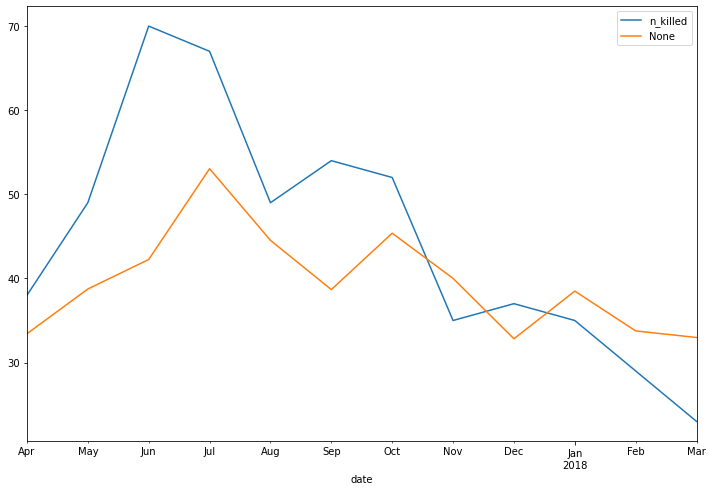

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
chicago2_test[['n_killed']].plot(legend=True,figsize=(12,8),ax=ax)
chicago2_prediction.plot(legend=True,figsize=(12,8),ax=ax)

# Washington

In [62]:
washington['n_guns_involved_T_F'] = washington['n_guns_involved'].notna()
washington1 = pd.get_dummies(washington['n_guns_involved_T_F'], drop_first=True)
washington1 = washington1.join(washington[['Month-Yr','congressional_district', 'state_senate_district','state_house_district','n_killed','n_injured','year1']])
washington1.dropna(subset=['congressional_district', 'state_senate_district','state_house_district'],inplace=True)
washington1 = washington1.set_index(["state_house_district", "Month-Yr"])
washington1

True  congressional_district  \
state_house_district Month-Yr                                   
24.0                 2014-01-01     1                     4.0   
120.0                2014-05-01     0                    10.0   
                     2014-06-01     0                    10.0   
40.0                 2014-06-01     0                     4.0   
61.0                 2014-07-01     0                     3.0   
...                               ...                     ...   
48.0                 2018-01-01     1                    18.0   
15.0                 2018-02-01     1                    18.0   
48.0                 2018-03-01     1                    18.0   
26.0                 2018-03-01     1                     4.0   
78.0                 2018-03-01     1                     2.0   

                                 state_senate_district  n_killed  n_injured  \
state_house_district Month-Yr                                                 
24.0                 2014-01-01                   24.0         0          0   
120.0                2014-05-01                   24.0         1          0   
                     2014-06-01                   24.0         1          0   
40.0                 2014-06-01                   28.0         1          0   
61.0                 2014-07-01                   26.0         0          0   
...                                                ...       ...        ...   
48.0                 2018-01-01                   46.0         0          0   
15.0                 2018-02-01                   46.0         1          0   
48.0                 2018-03-01                   46.0         0          0   
26.0                 2018-03-01                   26.0         0          1   
78.0                 2018-03-01                   39.0         0          1   

                                year1  
state_house_district Month-Yr          
24.0                 2014-01-01  2014  
120.0                2014-05-01  2014  
                     2014-06-01  2014  
40.0                 2014-06-01  2014  
61.0                 2014-07-01  2014  
...                               ...  
48.0                 2018-01-01  2018  
15.0                 2018-02-01  2018  
48.0                 2018-03-01  2018  
26.0                 2018-03-01  2018  
78.0                 2018-03-01  2018  

[61 rows x 6 columns]

In [63]:
y_washington = washington1['n_killed']
X_washington = washington1.drop(['n_killed','n_injured'],axis=1)

# washington_exog = sm.add_constant(X_washington)
washington_mod = PooledOLS(y_washington, X_washington)#,check_rank =False)
washington_pooled_res = washington_mod.fit(cov_type='clustered', cluster_entity=True)
washington_pooled_res

Dep. Variable:,n_killed,R-squared:,0.1220
Estimator:,PooledOLS,R-squared (Between):,0.2072
No. Observations:,61,R-squared (Within):,0.0613
Date:,"Wed, Apr 28 2021",R-squared (Overall):,0.1220
Time:,18:32:36,Log-likelihood,-43.764
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0523
Entities:,22,P-value,0.4069
Avg Obs:,2.7727,Distribution:,"F(7,53)"
Min Obs:,1.0000,,
Max Obs:,10.0000,F-statistic (robust):,8.0023


In [64]:
adf_test(washington2['n_killed'])

ADF Test:
ADF test statistics    -1.114177e+01
p-value                 3.095486e-20
# lag used              1.400000e+01
# observation           3.264000e+03
critical value (1%)    -3.432355e+00
critical value (5%)    -2.862426e+00
critical value (10%)   -2.567242e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


56

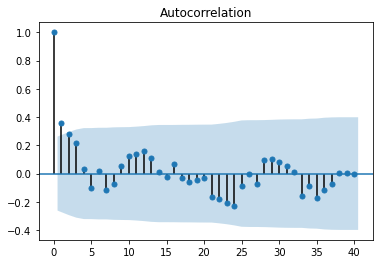

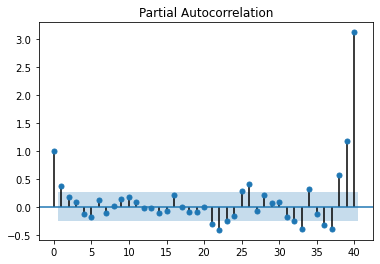

In [65]:
washington2 = washington2.groupby([washington2.index])[['n_killed']].agg(np.sum)
plot_acf(washington2,lags = 40);
plot_pacf(washington2,lags = 40);
len(washington2)

In [66]:
washington2_train = washington2.iloc[:44]
washington2_test = washington2.iloc[44:]

In [67]:
washington2_model = ARIMA(washington2['n_killed'],order=(0,0,2))
washington2_result = washington2_model.fit(disp=-1)
washington2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               n_killed   No. Observations:                   56
Model:                     ARMA(0, 2)   Log Likelihood                -151.847
Method:                       css-mle   S.D. of innovations              3.638
Date:                Wed, 28 Apr 2021   AIC                            311.694
Time:                        18:32:41   BIC                            319.796
Sample:                             0   HQIC                           314.835
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3207      0.701     11.871      0.000       6.947       9.694
ma.L1.n_killed     0.2595      0.159      1.632      0.103      -0.052       0.571
ma.L2.n_killed     0.1921      0.146      1.314      0.189      -0.094       0.479
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.6755           -2.1794j            2.2817           -0.2978
MA.2           -0.6755           +2.1794j            2.2817            0.2978
-----------------------------------------------------------------------------
"""

In [68]:
washington2_start = len(washington2_train)
washington2_end = len(washington2_train)+len(washington2_test)-1
washington2_prediction = washington2_result.predict(start=washington2_start,end=washington2_end,typ='levels')
washington2_prediction

date
2017-04-01    9.166258
2017-05-01    8.204521
2017-06-01    7.918927
2017-07-01    9.013527
2017-08-01    9.495420
2017-09-01    8.765790
2017-10-01    8.286307
2017-11-01    8.810381
2017-12-01    8.699074
2018-01-01    8.435206
2018-02-01    8.525060
2018-03-01    7.254938
dtype: float64

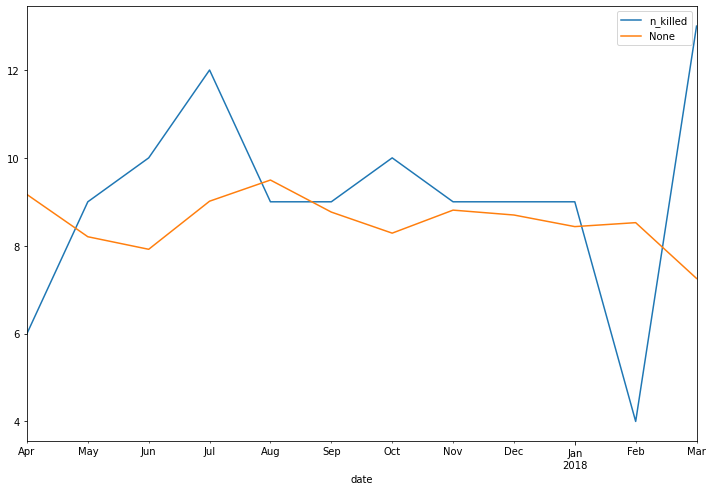

In [69]:
fig, ax = plt.subplots()
washington2_test[['n_killed']].plot(legend=True,figsize=(12,8),ax=ax)
washington2_prediction.plot(legend=True,figsize=(12,8),ax=ax)

# New Orleans

In [70]:
newOrleans['n_guns_involved_T_F'] = newOrleans['n_guns_involved'].notna()
newOrleans1 = pd.get_dummies(newOrleans['n_guns_involved_T_F'], drop_first=True)
newOrleans1 = newOrleans1.join(newOrleans[['Month-Yr','congressional_district', 'state_senate_district','state_house_district','n_killed','n_injured','year1']])
newOrleans1.dropna(subset=['congressional_district', 'state_senate_district','state_house_district'],inplace=True)
newOrleans1 = newOrleans1.set_index(["state_house_district", "Month-Yr"])
newOrleans1

True  congressional_district  \
state_house_district Month-Yr                                   
93.0                 2013-01-01     0                     2.0   
                     2013-02-01     1                     2.0   
97.0                 2013-05-01     1                     2.0   
                     2013-06-01     1                     2.0   
93.0                 2014-01-01     0                     2.0   
...                               ...                     ...   
                     2018-03-01     1                     2.0   
100.0                2018-03-01     1                     2.0   
102.0                2018-03-01     1                     2.0   
103.0                2018-03-01     1                     2.0   
99.0                 2018-03-01     1                     2.0   

                                 state_senate_district  n_killed  n_injured  \
state_house_district Month-Yr                                                 
93.0                 2013-01-01                    5.0         0          5   
                     2013-02-01                    4.0         0          4   
97.0                 2013-05-01                    4.0         0         19   
                     2013-06-01                    3.0         0          4   
93.0                 2014-01-01                    4.0         1          0   
...                                                ...       ...        ...   
                     2018-03-01                    4.0         1          0   
100.0                2018-03-01                    3.0         0          1   
102.0                2018-03-01                    3.0         0          0   
103.0                2018-03-01                    3.0         1          1   
99.0                 2018-03-01                    3.0         0          0   

                                year1  
state_house_district Month-Yr          
93.0                 2013-01-01  2013  
                     2013-02-01  2013  
97.0                 2013-05-01  2013  
                     2013-06-01  2013  
93.0                 2014-01-01  2014  
...                               ...  
                     2018-03-01  2018  
100.0                2018-03-01  2018  
102.0                2018-03-01  2018  
103.0                2018-03-01  2018  
99.0                 2018-03-01  2018  

[2896 rows x 6 columns]

In [71]:
y_newOrleans = newOrleans1['n_killed']
X_newOrleans = newOrleans1.drop(['n_killed','n_injured'],axis=1)

newOrleans_exog = sm.add_constant(X_newOrleans)
newOrleans_mod = PooledOLS(y_newOrleans, newOrleans_exog)
newOrleans_pooled_res = newOrleans_mod.fit(cov_type='clustered', cluster_entity=True)
newOrleans_pooled_res

Dep. Variable:,n_killed,R-squared:,0.0102
Estimator:,PooledOLS,R-squared (Between):,0.1938
No. Observations:,2896,R-squared (Within):,0.0084
Date:,"Wed, Apr 28 2021",R-squared (Overall):,0.0102
Time:,18:32:51,Log-likelihood,-1812.9
Cov. Estimator:,Clustered,,
,,F-statistic:,3.7108
Entities:,16,P-value,0.0003
Avg Obs:,181.00,Distribution:,"F(8,2887)"
Min Obs:,1.0000,,
Max Obs:,782.00,F-statistic (robust):,141.13


In [73]:
adf_test(newOrleans2['n_killed'])

ADF Test:
ADF test statistics     -4.902110
p-value                  0.000035
# lag used               0.000000
# observation           54.000000
critical value (1%)     -3.557709
critical value (5%)     -2.916770
critical value (10%)    -2.596222
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


55

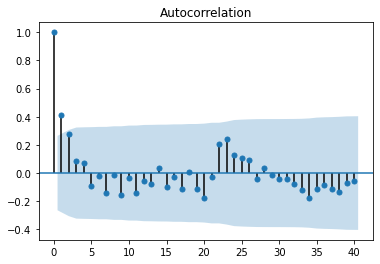

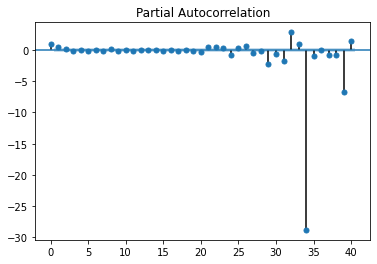

In [74]:
newOrleans2 = newOrleans2.groupby([newOrleans2.index])[['n_killed']].agg(np.sum)
plot_acf(newOrleans2,lags = 40);
plot_pacf(newOrleans2,lags = 40);
len(newOrleans2)

In [77]:
newOrleans2_train = newOrleans2.iloc[:43]
newOrleans2_test = newOrleans2.iloc[43:]

In [76]:
newOrleans2_model = ARIMA(newOrleans2['n_killed'],order=(1,0,0))
newOrleans2_result = newOrleans2_model.fit(disp=-1)
newOrleans2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               n_killed   No. Observations:                   55
Model:                     ARMA(1, 0)   Log Likelihood                -169.531
Method:                       css-mle   S.D. of innovations              5.267
Date:                Wed, 28 Apr 2021   AIC                            345.063
Time:                        18:33:19   BIC                            351.085
Sample:                             0   HQIC                           347.391
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5609      1.267      9.911      0.000      10.077      15.045
ar.L1.n_killed     0.4456      0.126      3.543      0.000       0.199       0.692
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2443           +0.0000j            2.2443            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
newOrleans2_start = len(newOrleans2_train)
newOrleans2_end = len(newOrleans2_train)+len(newOrleans2_test)-1
newOrleans2_prediction = newOrleans2_result.predict(start=newOrleans2_start,end=newOrleans2_end,typ='levels')

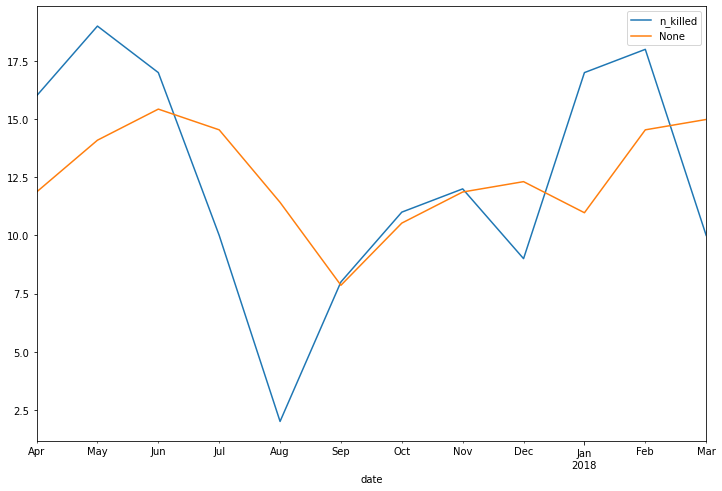

In [79]:
fig, ax = plt.subplots()
newOrleans2_test[['n_killed']].plot(legend=True,figsize=(12,8),ax=ax)
newOrleans2_prediction.plot(legend=True,figsize=(12,8),ax=ax)

# USA

In [80]:
df1['n_guns_involved_T_F'] = df1['n_guns_involved'].notna()
usa = pd.get_dummies(df1['n_guns_involved_T_F'], drop_first=True)
usa = usa.join(df1[['Month-Yr','congressional_district', 'state_senate_district','state_house_district','n_killed','n_injured','year1']])
usa.dropna(subset=['congressional_district', 'state_senate_district','state_house_district'],inplace=True)
usa = usa.set_index(["state_house_district", "Month-Yr"])
usa.head()

,,True,congressional_district,state_senate_district,n_killed,n_injured,year1
state_house_district,Month-Yr,,,,,,
62.0,2013-01-01,0,43.0,35.0,1,3,2013
56.0,2013-01-01,1,9.0,13.0,1,3,2013
40.0,2013-01-01,0,6.0,28.0,4,0,2013
62.0,2013-01-01,1,6.0,27.0,2,2,2013
72.0,2013-01-01,0,1.0,11.0,4,0,2013


In [81]:
y_usa = usa['n_killed']
X_usa = usa.drop(['n_killed','n_injured'],axis=1)

usa_exog = sm.add_constant(X_usa)
usa_mod = PooledOLS(y_usa, usa_exog)
usa_pooled_res = usa_mod.fit(cov_type='clustered', cluster_entity=True)
usa_pooled_res

Dep. Variable:,n_killed,R-squared:,0.0072
Estimator:,PooledOLS,R-squared (Between):,-0.0190
No. Observations:,199850,R-squared (Within):,0.0071
Date:,"Wed, Apr 28 2021",R-squared (Overall):,0.0072
Time:,18:33:46,Log-likelihood,-1.542e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,180.57
Entities:,275,P-value,0.0000
Avg Obs:,726.73,Distribution:,"F(8,199841)"
Min Obs:,1.0000,,
Max Obs:,3475.0,F-statistic (robust):,24.159


63

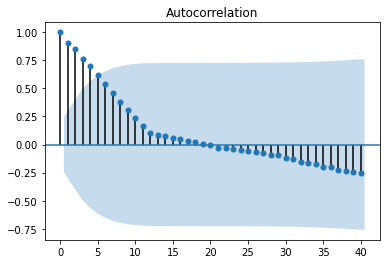

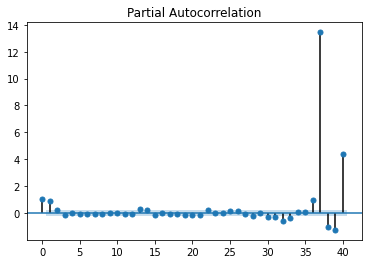

In [84]:
usa2 = usa2.groupby([usa2.index])[['n_killed']].agg(np.sum)
plot_acf(usa2,lags = 40);
plot_pacf(usa2,lags = 40);
len(usa2)

In [86]:
usa2_train = usa2.iloc[:43]
usa2_test = usa2.iloc[43:]

In [87]:
usa2_model = ARIMA(usa2['n_killed'],order=(1,0,1))
usa2_result = usa2_model.fit(disp=-1)
usa2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               n_killed   No. Observations:                   63
Model:                     ARMA(1, 1)   Log Likelihood                -410.392
Method:                       css-mle   S.D. of innovations            160.064
Date:                Wed, 28 Apr 2021   AIC                            828.784
Time:                        18:36:53   BIC                            837.356
Sample:                    01-01-2013   HQIC                           832.155
                         - 03-01-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            755.4022    403.625      1.872      0.061     -35.688    1546.492
ar.L1.n_killed     0.9724      0.027     36.029      0.000       0.920       1.025
ma.L1.n_killed    -0.2223      0.113     -1.969      0.049      -0.444      -0.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0284           +0.0000j            1.0284            0.0000
MA.1            4.4988           +0.0000j            4.4988            0.0000
-----------------------------------------------------------------------------
"""

In [89]:
usa2_start = len(usa2_train)
usa2_end = len(usa2_train)+len(usa2_test)-1
usa2_prediction = usa2_result.predict(start=usa2_start,end=usa2_end,typ='levels')

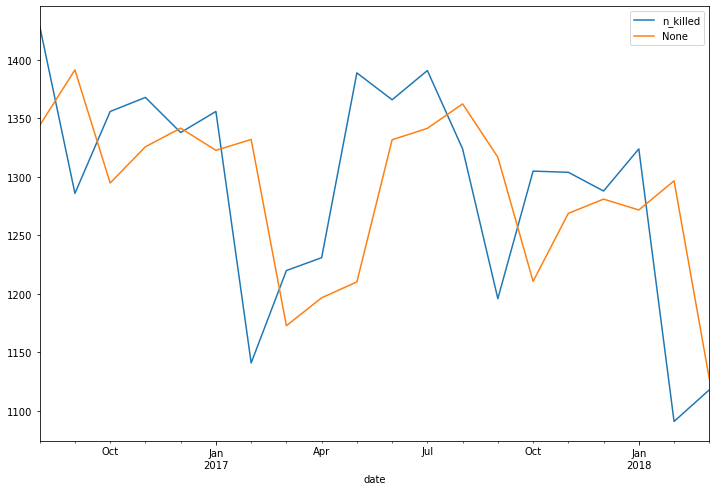

In [90]:
fig, ax = plt.subplots()
usa2_test[['n_killed']].plot(legend=True,figsize=(12,8),ax=ax)
usa2_prediction.plot(legend=True,figsize=(12,8),ax=ax)

In [ ]:
df1.drop(['incident_id','incident_url_fields_missing','n_guns_involved_T_F'],axis=1).corr()

In [ ]:
plt.hist(df1['n_guns_involved'], bins=30,range=(0,10));

Number of n_guns_involved will be ideal but unfortunately a good portion of the data are missing.
Zip code will also be ideal.